In [126]:
#Import libraries
#import neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import RFE
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [127]:
df = pd.read_csv("C:\Moringa\Phase 5\Phase 5 Project\DSC-CapstoneProject\Data\Final_dataset_Final.csv")
df

,ID,GENDER,AGE,MARITAL_STATUS,EMPLOYMENT_STATUS,CREDIT_SCORE,SCORE_GRADE,NO_DEFAULT_LOAN,RISK_GRADE,PRODUCT,CURRENCY,NET INCOME,PRINCIPAL_DISBURSED,EMI,OD_DAYS,PRUDENTIAL_CLASSIFICATION,OD_AMOUNT,LOAN_STATUS
0,104465,MALE,NaN,NaN,NaN,480.0,JJ,1.0,B20,Premium Finance - Consumer,KES,0.00,"235,203.00","40,637.03",2995,LOSS,"45,011.10",EXPIRED
1,138046,MALE,55.0,NaN,NaN,537.0,JJ,2.0,B20,Consumer Unsecured Loan,KES,0.00,"215,000.00","7,186.79",2582,LOSS,"115,674.06",EXPIRED
2,173501,MALE,NaN,NaN,NaN,545.0,JJ,1.0,B20,Consumer Unsecured Loan,KES,0.00,"155,000.00","4,258.42",2667,LOSS,"65,541.89",EXPIRED
3,141836,MALE,NaN,NaN,NaN,626.0,HH,3.0,B20,Consumer Unsecured Loan,KES,0.00,"335,000.00","7,158.92",2810,LOSS,"297,407.57",EXPIRED
4,65973,MALE,63.0,MARRIED,EMPLOYED,524.0,JJ,2.0,B20,Consumer Unsecured Loan,KES,0.00,"105,000.00","2,136.29",2879,LOSS,"117,969.24",EXPIRED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115888,154303,MALE,38.0,MARRIED,SELF-EMPLOYED,624.0,HH,4.0,A5,Digital Personal Loan,KES,3090724.25,"100,000.00","34,398.05",0,NORMAL,0,CURRENT
115889,61445,MALE,43.0,MARRIED,EMPLOYED,579.0,JJ,1.0,A5,Mobile Loan,KES,819280.00,"20,746.00","21,088.53",0,NORMAL,0,CURRENT
115890,151235,MALE,27.0,SINGLE,EMPLOYED,636.0,HH,0.0,A5,Mobile Loan,KES,529145.61,"12,700.00","12,909.69",0,NORMAL,0,CURRENT
115891,181809,FEMALE,42.0,NaN,OTHER,667.0,FF,0.0,A5,Mobile Loan,KES,4129210.00,"13,000.00","13,214.64",0,NORMAL,0,CURRENT


In [128]:
# Check the number of rows to confirm
print("Total rows before cleaning:", df.shape[0])

Total rows before cleaning: 115893


In [129]:
df.isna().sum()

ID                               0
GENDER                       15776
AGE                          17456
MARITAL_STATUS               45468
EMPLOYMENT_STATUS            31760
CREDIT_SCORE                 21012
SCORE_GRADE                  21322
NO_DEFAULT_LOAN              21322
RISK_GRADE                       0
PRODUCT                          1
CURRENCY                         0
NET INCOME                       0
PRINCIPAL_DISBURSED              0
EMI                              0
OD_DAYS                          0
PRUDENTIAL_CLASSIFICATION        0
OD_AMOUNT                        0
LOAN_STATUS                      0
dtype: int64

In [130]:
# Show the data types of all columns
df.dtypes 

ID                             int64
GENDER                        object
AGE                          float64
MARITAL_STATUS                object
EMPLOYMENT_STATUS             object
CREDIT_SCORE                 float64
SCORE_GRADE                   object
NO_DEFAULT_LOAN              float64
RISK_GRADE                    object
PRODUCT                       object
CURRENCY                      object
NET INCOME                   float64
PRINCIPAL_DISBURSED           object
EMI                           object
OD_DAYS                        int64
PRUDENTIAL_CLASSIFICATION     object
OD_AMOUNT                     object
LOAN_STATUS                   object
dtype: object

In [131]:
df.loc[:, ["EMI", "OD_AMOUNT", "PRINCIPAL_DISBURSED"]]

,EMI,OD_AMOUNT,PRINCIPAL_DISBURSED
0,"40,637.03","45,011.10","235,203.00"
1,"7,186.79","115,674.06","215,000.00"
2,"4,258.42","65,541.89","155,000.00"
3,"7,158.92","297,407.57","335,000.00"
4,"2,136.29","117,969.24","105,000.00"
...,...,...,...
115888,"34,398.05",0,"100,000.00"
115889,"21,088.53",0,"20,746.00"
115890,"12,909.69",0,"12,700.00"
115891,"13,214.64",0,"13,000.00"


In [132]:
df["EMI"] = df["EMI"].astype(str).str.replace(",", "").astype(float)
df["OD_AMOUNT"] = df["OD_AMOUNT"].astype(str).str.replace(",", "").astype(float)
df["PRINCIPAL_DISBURSED"] = df["PRINCIPAL_DISBURSED"].astype(str).str.replace(",", "").astype(float)

In [133]:
# Show the data types of all columns
df.dtypes 

ID                             int64
GENDER                        object
AGE                          float64
MARITAL_STATUS                object
EMPLOYMENT_STATUS             object
CREDIT_SCORE                 float64
SCORE_GRADE                   object
NO_DEFAULT_LOAN              float64
RISK_GRADE                    object
PRODUCT                       object
CURRENCY                      object
NET INCOME                   float64
PRINCIPAL_DISBURSED          float64
EMI                          float64
OD_DAYS                        int64
PRUDENTIAL_CLASSIFICATION     object
OD_AMOUNT                    float64
LOAN_STATUS                   object
dtype: object

In [134]:
df.loc[:, ["EMI", "OD_AMOUNT", "PRINCIPAL_DISBURSED"]]

,EMI,OD_AMOUNT,PRINCIPAL_DISBURSED
0,40637.03,45011.10,235203.0
1,7186.79,115674.06,215000.0
2,4258.42,65541.89,155000.0
3,7158.92,297407.57,335000.0
4,2136.29,117969.24,105000.0
...,...,...,...
115888,34398.05,0.00,100000.0
115889,21088.53,0.00,20746.0
115890,12909.69,0.00,12700.0
115891,13214.64,0.00,13000.0


In [135]:
df.isna().sum()

ID                               0
GENDER                       15776
AGE                          17456
MARITAL_STATUS               45468
EMPLOYMENT_STATUS            31760
CREDIT_SCORE                 21012
SCORE_GRADE                  21322
NO_DEFAULT_LOAN              21322
RISK_GRADE                       0
PRODUCT                          1
CURRENCY                         0
NET INCOME                       0
PRINCIPAL_DISBURSED              0
EMI                              0
OD_DAYS                          0
PRUDENTIAL_CLASSIFICATION        0
OD_AMOUNT                        0
LOAN_STATUS                      0
dtype: int64

In [136]:
# Drop NaN
df.dropna(subset=["CREDIT_SCORE", "SCORE_GRADE", "GENDER", "AGE", "EMPLOYMENT_STATUS"], inplace=True) 

In [137]:
df["MARITAL_STATUS"].value_counts()

MARITAL_STATUS
MARRIED     40826
SINGLE      22467
OTHER        1408
WIDOWED       163
DIVORCED       99
ENGAGED        99
PARTNER        29
Name: count, dtype: int64

In [138]:
df["MARITAL_STATUS"] = df["MARITAL_STATUS"].fillna("OTHER")

In [139]:
df["MARITAL_STATUS"].value_counts()

MARITAL_STATUS
MARRIED     40826
SINGLE      22467
OTHER       15588
WIDOWED       163
DIVORCED       99
ENGAGED        99
PARTNER        29
Name: count, dtype: int64

In [140]:
df.isna().sum()

ID                           0
GENDER                       0
AGE                          0
MARITAL_STATUS               0
EMPLOYMENT_STATUS            0
CREDIT_SCORE                 0
SCORE_GRADE                  0
NO_DEFAULT_LOAN              0
RISK_GRADE                   0
PRODUCT                      0
CURRENCY                     0
NET INCOME                   0
PRINCIPAL_DISBURSED          0
EMI                          0
OD_DAYS                      0
PRUDENTIAL_CLASSIFICATION    0
OD_AMOUNT                    0
LOAN_STATUS                  0
dtype: int64

In [141]:
# Define default vs. non-default conditions
df['DEFAULT_STATUS'] = np.where(df['PRUDENTIAL_CLASSIFICATION'].isin(['SUBSTANDARD', 'DOUBTFUL', 'LOSS']), 'DEFAULT', 'NON-DEFAULT')

Continue using imported cleaned dataset from teamwork for EDA

In [142]:
df_cleaned = pd.read_csv("C:\Moringa\Phase 5\Phase 5 Project\DSC-CapstoneProject\Data\Cleaned_dataset.csv")
df_cleaned

,ID,GENDER,AGE,MARITAL_STATUS,EMPLOYMENT_STATUS,CREDIT_SCORE,SCORE_GRADE,NO_DEFAULT_LOAN,RISK_GRADE,PRODUCT,CURRENCY,NET INCOME,PRINCIPAL_DISBURSED,EMI,OD_DAYS,PRUDENTIAL_CLASSIFICATION,OD_AMOUNT,LOAN_STATUS,DEFAULT_STATUS
0,65973,MALE,63.0,MARRIED,EMPLOYED,524.0,JJ,2.0,B20,Consumer Unsecured Loan,KES,0.00,105000.00,2136.29,2879,LOSS,117969.24,EXPIRED,DEFAULT
1,123979,FEMALE,43.0,MARRIED,OTHER,713.0,CC,0.0,A5,Mortgage Loan,KES,6082350.54,5189721.55,40346.25,0,NORMAL,0.00,CURRENT,NON-DEFAULT
2,179032,MALE,45.0,MARRIED,EMPLOYED,610.0,II,1.0,B20,Consumer Unsecured Loan,KES,0.00,680000.00,14996.64,3763,LOSS,857627.23,EXPIRED,DEFAULT
3,75503,MALE,50.0,MARRIED,SELF-EMPLOYED,625.0,HH,1.0,A5,Motor Vehicle Loan,KES,1916500.00,2489731.41,61804.69,0,NORMAL,0.00,CURRENT,NON-DEFAULT
4,76448,MALE,35.0,MARRIED,EMPLOYED,657.0,GG,3.0,B11,Motor Vehicle Loan,KES,0.00,4772722.00,115661.85,754,LOSS,3725529.80,EXPIRED,DEFAULT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79266,154303,MALE,38.0,MARRIED,SELF-EMPLOYED,624.0,HH,4.0,A5,Digital Personal Loan,KES,3090724.25,100000.00,34398.05,0,NORMAL,0.00,CURRENT,NON-DEFAULT
79267,61445,MALE,43.0,MARRIED,EMPLOYED,579.0,JJ,1.0,A5,Mobile Loan,KES,819280.00,20746.00,21088.53,0,NORMAL,0.00,CURRENT,NON-DEFAULT
79268,151235,MALE,27.0,SINGLE,EMPLOYED,636.0,HH,0.0,A5,Mobile Loan,KES,529145.61,12700.00,12909.69,0,NORMAL,0.00,CURRENT,NON-DEFAULT
79269,181809,FEMALE,42.0,OTHER,OTHER,667.0,FF,0.0,A5,Mobile Loan,KES,4129210.00,13000.00,13214.64,0,NORMAL,0.00,CURRENT,NON-DEFAULT


In [143]:
df_cleaned.isna().sum()

ID                           0
GENDER                       0
AGE                          0
MARITAL_STATUS               0
EMPLOYMENT_STATUS            0
CREDIT_SCORE                 0
SCORE_GRADE                  0
NO_DEFAULT_LOAN              0
RISK_GRADE                   0
PRODUCT                      0
CURRENCY                     0
NET INCOME                   0
PRINCIPAL_DISBURSED          0
EMI                          0
OD_DAYS                      0
PRUDENTIAL_CLASSIFICATION    0
OD_AMOUNT                    0
LOAN_STATUS                  0
DEFAULT_STATUS               0
dtype: int64

In [144]:
print(df_cleaned.columns)

Index(['ID', 'GENDER', 'AGE', 'MARITAL_STATUS', 'EMPLOYMENT_STATUS',
       'CREDIT_SCORE', 'SCORE_GRADE', 'NO_DEFAULT_LOAN', 'RISK_GRADE',
       'PRODUCT', 'CURRENCY', 'NET INCOME', 'PRINCIPAL_DISBURSED', 'EMI',
       'OD_DAYS', 'PRUDENTIAL_CLASSIFICATION', 'OD_AMOUNT', 'LOAN_STATUS',
       'DEFAULT_STATUS'],
      dtype='object')


We will drop the SCOREGRADE and RISK GRADE columns because they are very similar to the CREDIT SCORE and CRR columns and give the same information in another format

In [145]:
df_cleaned = df_cleaned.drop(columns=['SCORE_GRADE', 'RISK_GRADE'])
df_cleaned

,ID,GENDER,AGE,MARITAL_STATUS,EMPLOYMENT_STATUS,CREDIT_SCORE,NO_DEFAULT_LOAN,PRODUCT,CURRENCY,NET INCOME,PRINCIPAL_DISBURSED,EMI,OD_DAYS,PRUDENTIAL_CLASSIFICATION,OD_AMOUNT,LOAN_STATUS,DEFAULT_STATUS
0,65973,MALE,63.0,MARRIED,EMPLOYED,524.0,2.0,Consumer Unsecured Loan,KES,0.00,105000.00,2136.29,2879,LOSS,117969.24,EXPIRED,DEFAULT
1,123979,FEMALE,43.0,MARRIED,OTHER,713.0,0.0,Mortgage Loan,KES,6082350.54,5189721.55,40346.25,0,NORMAL,0.00,CURRENT,NON-DEFAULT
2,179032,MALE,45.0,MARRIED,EMPLOYED,610.0,1.0,Consumer Unsecured Loan,KES,0.00,680000.00,14996.64,3763,LOSS,857627.23,EXPIRED,DEFAULT
3,75503,MALE,50.0,MARRIED,SELF-EMPLOYED,625.0,1.0,Motor Vehicle Loan,KES,1916500.00,2489731.41,61804.69,0,NORMAL,0.00,CURRENT,NON-DEFAULT
4,76448,MALE,35.0,MARRIED,EMPLOYED,657.0,3.0,Motor Vehicle Loan,KES,0.00,4772722.00,115661.85,754,LOSS,3725529.80,EXPIRED,DEFAULT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79266,154303,MALE,38.0,MARRIED,SELF-EMPLOYED,624.0,4.0,Digital Personal Loan,KES,3090724.25,100000.00,34398.05,0,NORMAL,0.00,CURRENT,NON-DEFAULT
79267,61445,MALE,43.0,MARRIED,EMPLOYED,579.0,1.0,Mobile Loan,KES,819280.00,20746.00,21088.53,0,NORMAL,0.00,CURRENT,NON-DEFAULT
79268,151235,MALE,27.0,SINGLE,EMPLOYED,636.0,0.0,Mobile Loan,KES,529145.61,12700.00,12909.69,0,NORMAL,0.00,CURRENT,NON-DEFAULT
79269,181809,FEMALE,42.0,OTHER,OTHER,667.0,0.0,Mobile Loan,KES,4129210.00,13000.00,13214.64,0,NORMAL,0.00,CURRENT,NON-DEFAULT


In [146]:
#Checking for duplicates
print(df_cleaned.duplicated().sum())

0


In [147]:
#Value counts
# categorical columns
df_cleaned.select_dtypes(include='object').apply(lambda x: x.value_counts().sort_index())



,GENDER,MARITAL_STATUS,EMPLOYMENT_STATUS,PRODUCT,CURRENCY,PRUDENTIAL_CLASSIFICATION,LOAN_STATUS,DEFAULT_STATUS
105OYOH MORTGAGE,NaN,NaN,NaN,12.0,NaN,NaN,NaN,NaN
105OYOH Mortgage,NaN,NaN,NaN,42.0,NaN,NaN,NaN,NaN
AFFORDABLE HOUSING,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN
AUTH,NaN,NaN,NaN,NaN,NaN,NaN,417.0,NaN
Agribusiness Scheme Loan Product,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
UNEMPLOYED,NaN,NaN,54.0,NaN,NaN,NaN,NaN,NaN
USD,NaN,NaN,NaN,NaN,244.0,NaN,NaN,NaN
Unsecured Business Loan,NaN,NaN,NaN,39.0,NaN,NaN,NaN,NaN
WATCH,NaN,NaN,NaN,NaN,NaN,3042.0,NaN,NaN


Checking for outliers

In [148]:
numeric_cols = df_cleaned.select_dtypes(include=['number']).columns
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)  # 25th percentile
    Q3 = df[column].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile Range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Count and return outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return len(outliers), outliers[[column]]

# Loop through numeric columns and check for outliers
for col in numeric_cols:
    num_outliers, outliers_df = detect_outliers_iqr(df_cleaned, col)
    print(f"{col}: {num_outliers} outliers detected")


ID: 0 outliers detected
AGE: 1297 outliers detected
CREDIT_SCORE: 182 outliers detected
NO_DEFAULT_LOAN: 3362 outliers detected
NET INCOME: 8854 outliers detected
PRINCIPAL_DISBURSED: 11107 outliers detected
EMI: 4315 outliers detected
OD_DAYS: 16998 outliers detected
OD_AMOUNT: 15126 outliers detected


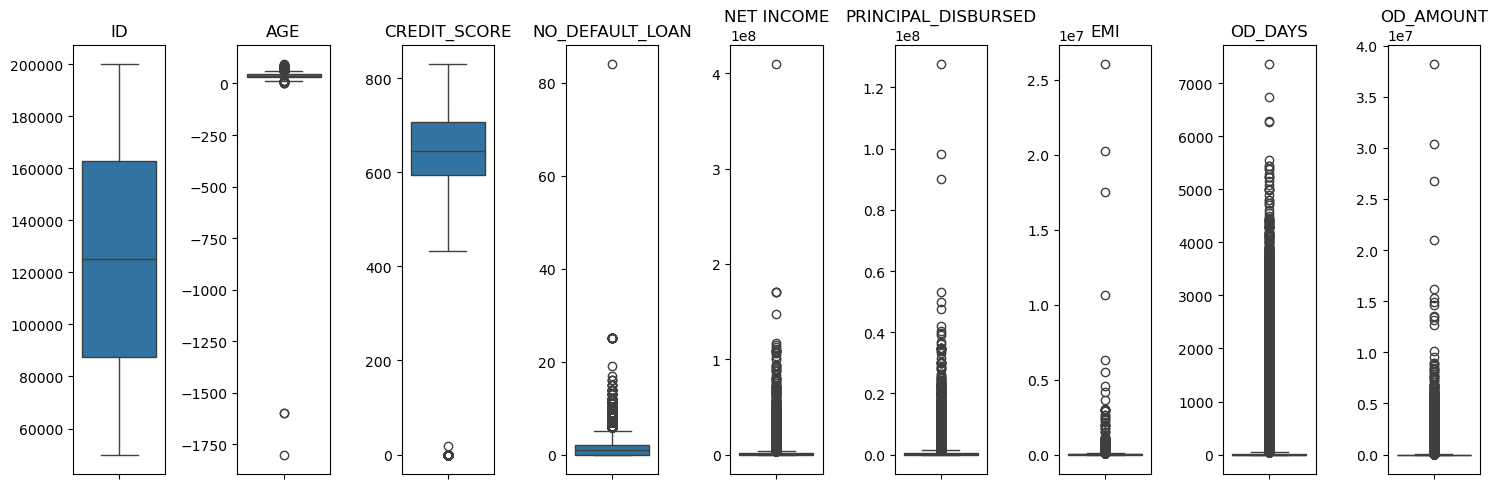

In [149]:
# Select only numeric columns
numeric_cols = df_cleaned.select_dtypes(include=['number']).columns

# Create subplots
fig, axes = plt.subplots(1, len(numeric_cols), figsize=(15, 5))  # One row, multiple columns

# Loop through numeric columns and plot individual boxplots
for i, col in enumerate(numeric_cols):
    sns.boxplot(y=df_cleaned[col], ax=axes[i])  # Removed `palette`
    axes[i].set_title(col)
    axes[i].set_ylabel("")  
    axes[i].set_xlabel("") 

# Adjust layout
plt.tight_layout()
plt.show()


Eliminating outliers in AGE. CREDIT SCORE

In [150]:
# Funtion to remove using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter out rows with outliers
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply to AGE and CREDIT_SCORE
df_cleaned = remove_outliers(df_cleaned, 'AGE')
df_cleaned = remove_outliers(df_cleaned, 'CREDIT_SCORE')

# Check new shape
print(df_cleaned.shape)


(77796, 17)


In [151]:
# Handling extreme outliers for OD_DAYS (Capping at 99th percentile)
od_days_cap = df_cleaned["OD_DAYS"].quantile(0.99)
df_cleaned["OD_DAYS"] = df_cleaned["OD_DAYS"].clip(upper=od_days_cap)

# Handling extreme outliers for NET INCOME (Capping at 99th percentile)
net_income_cap = df_cleaned["NET INCOME"].quantile(0.99)
df_cleaned["NET INCOME"] = df_cleaned["NET INCOME"].clip(upper=net_income_cap)

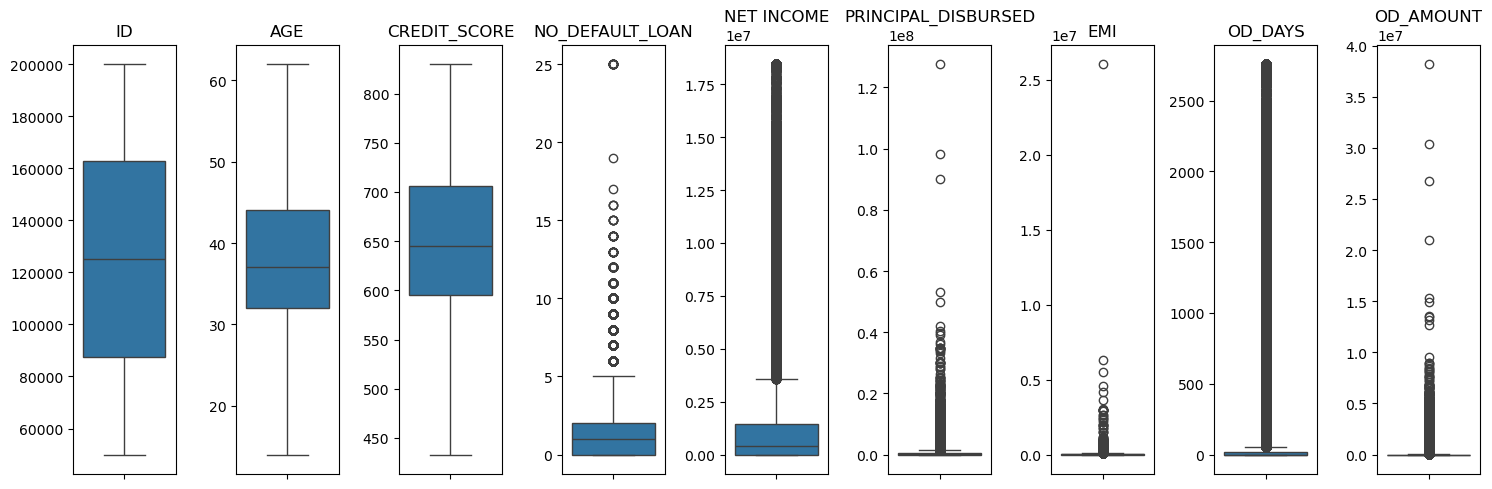

In [152]:
# Select only numeric columns
numeric_cols = df_cleaned.select_dtypes(include=['number']).columns

# Create subplots
fig, axes = plt.subplots(1, len(numeric_cols), figsize=(15, 5))  # One row, multiple columns

# Loop through numeric columns and plot individual boxplots
for i, col in enumerate(numeric_cols):
    sns.boxplot(y=df_cleaned[col], ax=axes[i])  # Removed `palette`
    axes[i].set_title(col)
    axes[i].set_ylabel("")  
    axes[i].set_xlabel("") 

# Adjust layout
plt.tight_layout()
plt.show()

In [153]:
df_cleaned["CREDIT_SCORE"].describe()

count    77796.000000
mean       649.336932
std         74.406318
min        433.000000
25%        595.000000
50%        645.000000
75%        706.000000
max        830.000000
Name: CREDIT_SCORE, dtype: float64

## Exploratory Data Analysis

Did EDA to see relationships between various columns:

1. The numeric columns. Age vs credit score, Age vs net income, Age vs no of defaulted loans
2. Important insights. Gender vs no of defaulted loans, gender vs credit score, gender vs loan status, gender vs CRR, Gender vs Net Income, Gender vs Loan Classification. Also age vs these same columns. 
3. Bar plots for categorical variables and histograms for numeric variables

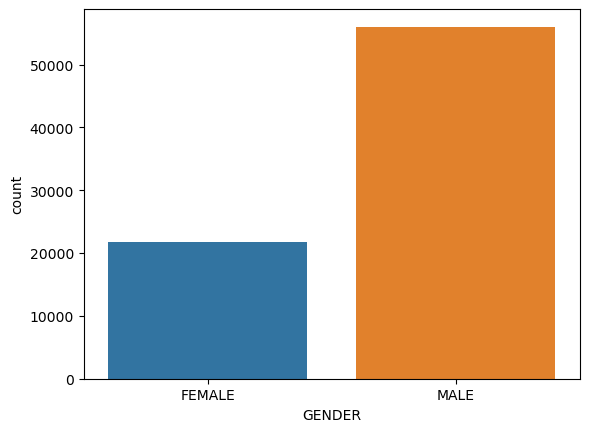

In [154]:
sns.countplot(x='GENDER', hue='GENDER', data=df_cleaned)
plt.show()


Distributions within categorical variables

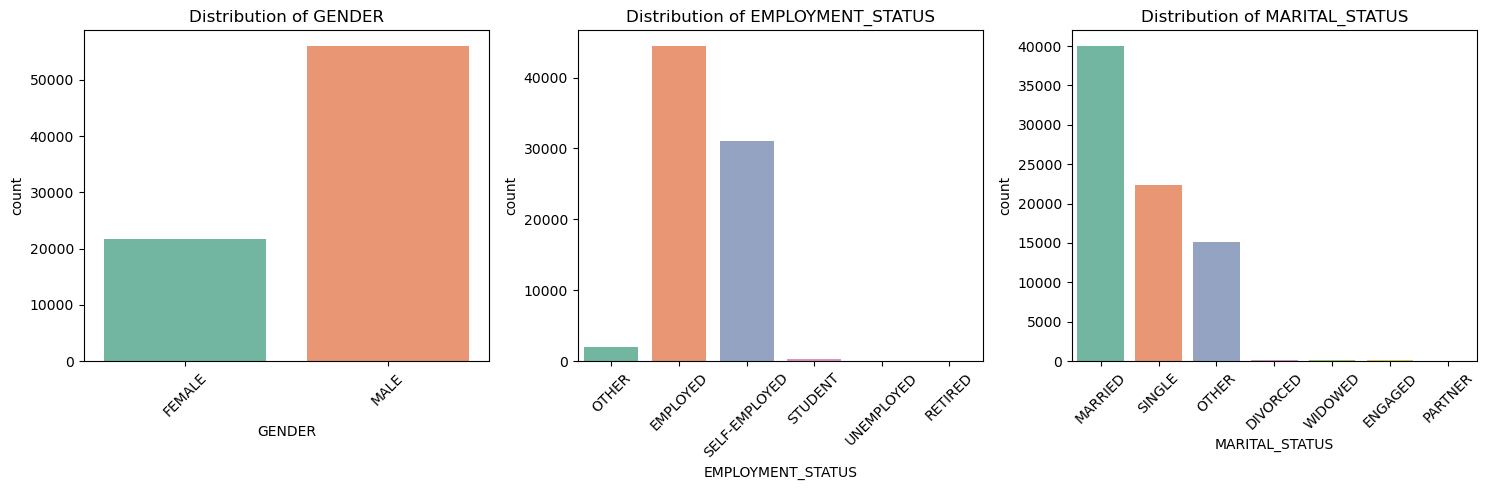

In [155]:
# Categorical columns
categorical_cols = ['GENDER', 'EMPLOYMENT_STATUS', 'MARITAL_STATUS']  # Add more if needed

# Create subplots
fig, axes = plt.subplots(1, len(categorical_cols), figsize=(15, 5))  # Adjust the layout

# Loop through categorical columns and plot each on a separate subplot
for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, data=df_cleaned,hue=col, legend=False, palette='Set2', ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xticks(range(len(df_cleaned[col].unique())))
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()



Relationships between Age and other key variables

Correlation between Age, Credit Score and Number of Loans detaulted

Credit Score across different loan statuses

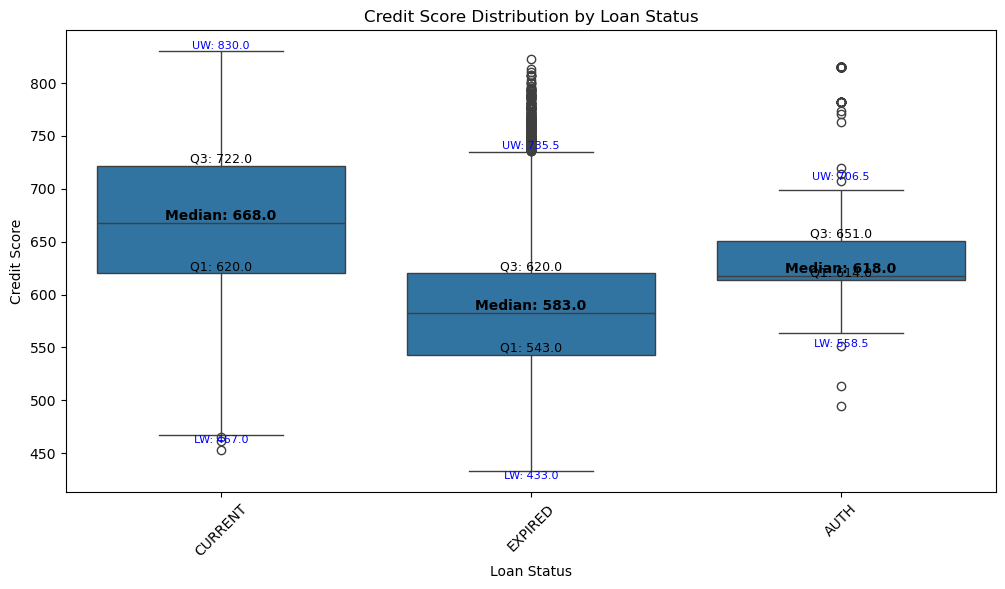

In [156]:
plt.figure(figsize=(12, 6))
ax = sns.boxplot(x='LOAN_STATUS', y='CREDIT_SCORE', data=df_cleaned)

# Loop through categories to annotate statistics
categories = df_cleaned['LOAN_STATUS'].unique()

for i, category in enumerate(categories):
    # Subset data
    subset = df_cleaned[df_cleaned['LOAN_STATUS'] == category]['CREDIT_SCORE']
    
    # Compute statistics
    median = subset.median()
    q1 = subset.quantile(0.25)
    q3 = subset.quantile(0.75)
    iqr = q3 - q1
    lower_whisker = max(subset.min(), q1 - 1.5 * iqr)
    upper_whisker = min(subset.max(), q3 + 1.5 * iqr)
    
    # Annotating values at correct positions
    ax.text(i, median, f'Median: {median:.1f}', ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')
    ax.text(i, q1, f'Q1: {q1:.1f}', ha='center', va='bottom', fontsize=9, color='black')
    ax.text(i, q3, f'Q3: {q3:.1f}', ha='center', va='bottom', fontsize=9, color='black')
    ax.text(i, lower_whisker, f'LW: {lower_whisker:.1f}', ha='center', va='top', fontsize=8, color='blue')
    ax.text(i, upper_whisker, f'UW: {upper_whisker:.1f}', ha='center', va='bottom', fontsize=8, color='blue')

# Final plot settings
plt.title("Credit Score Distribution by Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Credit Score")
plt.xticks(rotation=45)
plt.show()

Age across different prudential classifications.



C:\Users\Amani\AppData\Local\Temp\ipykernel_14328\680830304.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df_cleaned, x='PRUDENTIAL_CLASSIFICATION', y='AGE', palette='Set2')


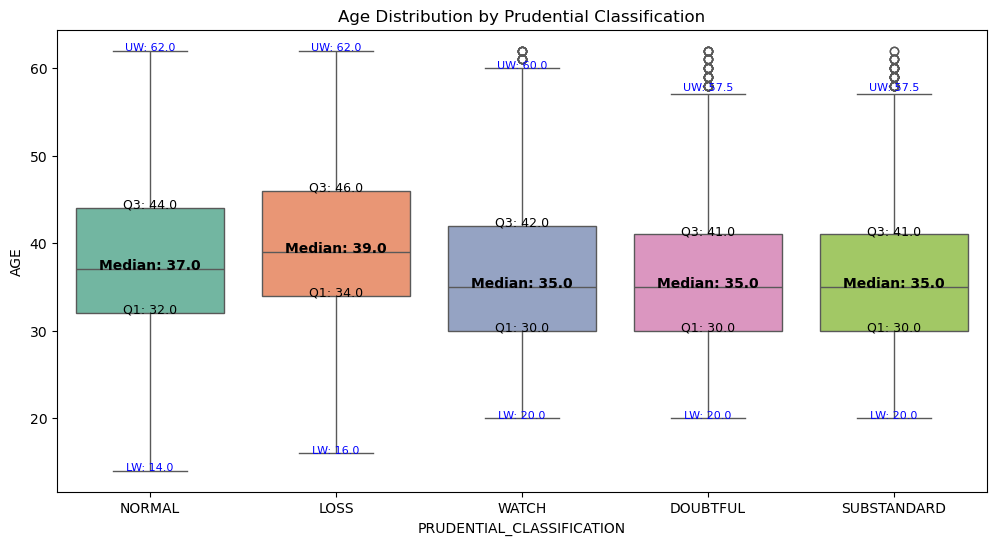

In [157]:
#Box plots
plt.figure(figsize=(12, 6))
ax = sns.boxplot(data=df_cleaned, x='PRUDENTIAL_CLASSIFICATION', y='AGE', palette='Set2')

# Defining unique categories
categories = df_cleaned['PRUDENTIAL_CLASSIFICATION'].unique()

# Annotating statisctics for ease of readability
for i, category in enumerate(categories):
    subset = df_cleaned[df_cleaned['PRUDENTIAL_CLASSIFICATION'] == category]['AGE']
    
    # Compute statistics
    median = subset.median()
    q1 = subset.quantile(0.25)
    q3 = subset.quantile(0.75)
    iqr = q3 - q1
    lower_whisker = max(subset.min(), q1 - 1.5 * iqr)
    upper_whisker = min(subset.max(), q3 + 1.5 * iqr)
    
    # Annotating values
    ax.text(i, median, f'Median: {median:.1f}', horizontalalignment='center', fontsize=10, color='black', fontweight='bold')
    ax.text(i, q1, f'Q1: {q1:.1f}', horizontalalignment='center', fontsize=9, color='black')
    ax.text(i, q3, f'Q3: {q3:.1f}', horizontalalignment='center', fontsize=9, color='black')
    ax.text(i, lower_whisker, f'LW: {lower_whisker:.1f}', horizontalalignment='center', fontsize=8, color='blue')
    ax.text(i, upper_whisker, f'UW: {upper_whisker:.1f}', horizontalalignment='center', fontsize=8, color='blue')

# Titles and labels
plt.title("Age Distribution by Prudential Classification")
plt.xlabel("PRUDENTIAL_CLASSIFICATION")
plt.ylabel("AGE")

plt.show()



Relationship between number of defaulted loans and loan status

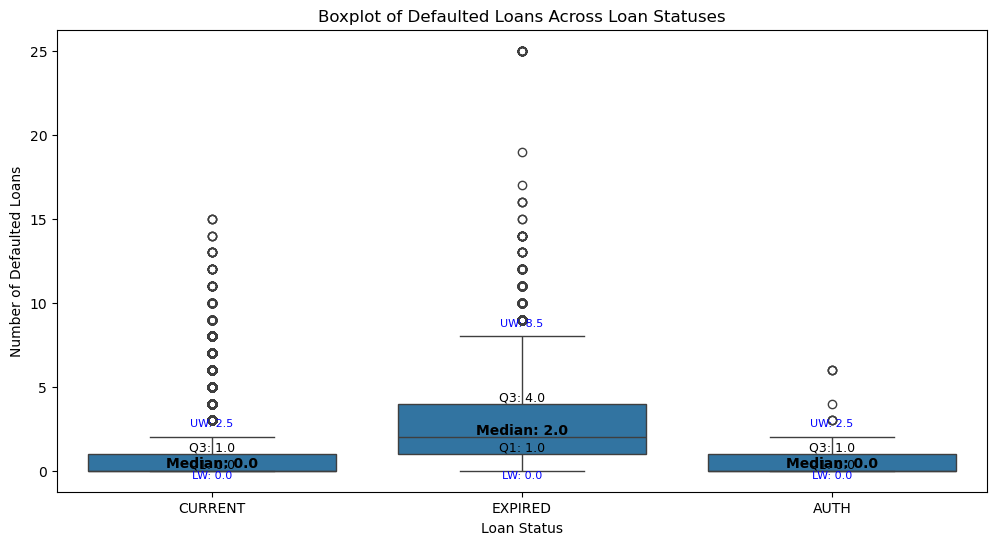

In [158]:
# Create figure and boxplot
plt.figure(figsize=(12, 6))
ax = sns.boxplot(data=df_cleaned, x='LOAN_STATUS', y='NO_DEFAULT_LOAN')

# Loop through categories to annotate statistics
categories = df_cleaned['LOAN_STATUS'].unique()

for i, category in enumerate(categories):
    # Correct subset selection
    subset = df_cleaned[df_cleaned['LOAN_STATUS'] == category]['NO_DEFAULT_LOAN']
    
    # Compute statistics
    median = subset.median()
    q1 = subset.quantile(0.25)
    q3 = subset.quantile(0.75)
    iqr = q3 - q1
    lower_whisker = max(subset.min(), q1 - 1.5 * iqr)
    upper_whisker = min(subset.max(), q3 + 1.5 * iqr)
    
    # Annotating values at correct positions
    ax.text(i, median, f'Median: {median:.1f}', ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')
    ax.text(i, q1, f'Q1: {q1:.1f}', ha='center', va='bottom', fontsize=9, color='black')
    ax.text(i, q3, f'Q3: {q3:.1f}', ha='center', va='bottom', fontsize=9, color='black')
    ax.text(i, lower_whisker, f'LW: {lower_whisker:.1f}', ha='center', va='top', fontsize=8, color='blue')
    ax.text(i, upper_whisker, f'UW: {upper_whisker:.1f}', ha='center', va='bottom', fontsize=8, color='blue')

# Final plot settings
plt.title("Boxplot of Defaulted Loans Across Loan Statuses")
plt.xlabel("Loan Status")
plt.ylabel("Number of Defaulted Loans")
plt.show()


Relationships between Age, Credit Score and Loan Status

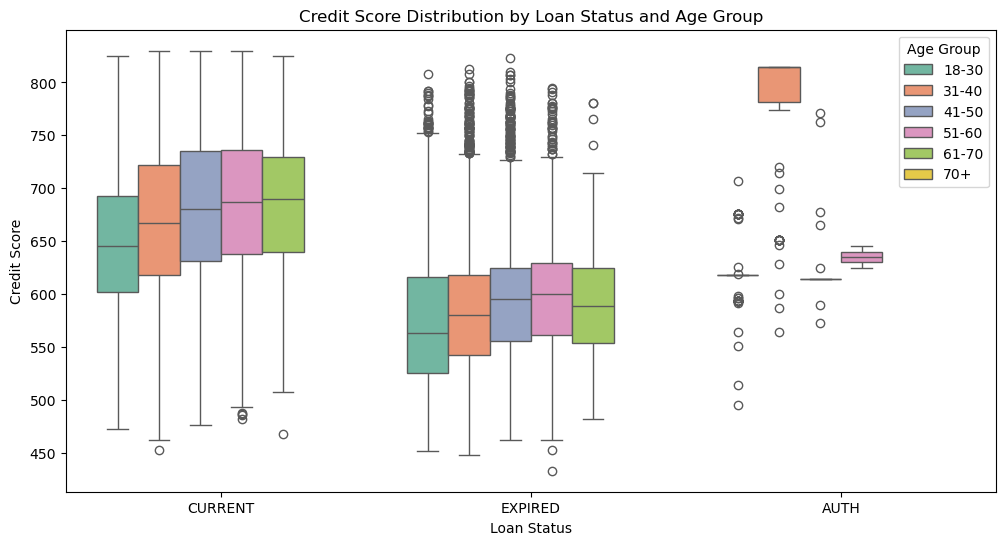

In [159]:
# Create Age Groups
df_cleaned['AGE_GROUP'] = pd.cut(df_cleaned['AGE'], bins=[18, 30, 40, 50, 60, 70, 100], 
                                 labels=["18-30", "31-40", "41-50", "51-60", "61-70", "70+"])

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned, x='LOAN_STATUS', y='CREDIT_SCORE', hue='AGE_GROUP', palette='Set2')
plt.title("Credit Score Distribution by Loan Status and Age Group")
plt.xlabel("Loan Status")
plt.ylabel("Credit Score")
plt.legend(title="Age Group")
plt.show()


Relationship between marital status and prudential classification

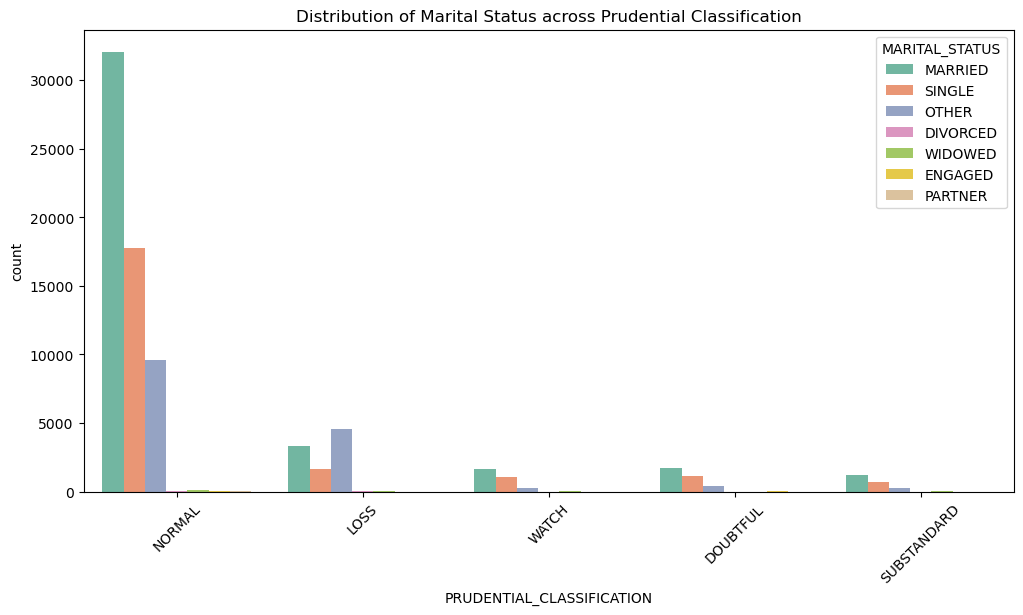

In [160]:
plt.figure(figsize=(12, 6))
sns.countplot(x='PRUDENTIAL_CLASSIFICATION', hue='MARITAL_STATUS', data=df_cleaned, palette='Set2')
plt.title("Distribution of Marital Status across Prudential Classification")
plt.xticks(rotation=45)
plt.show()

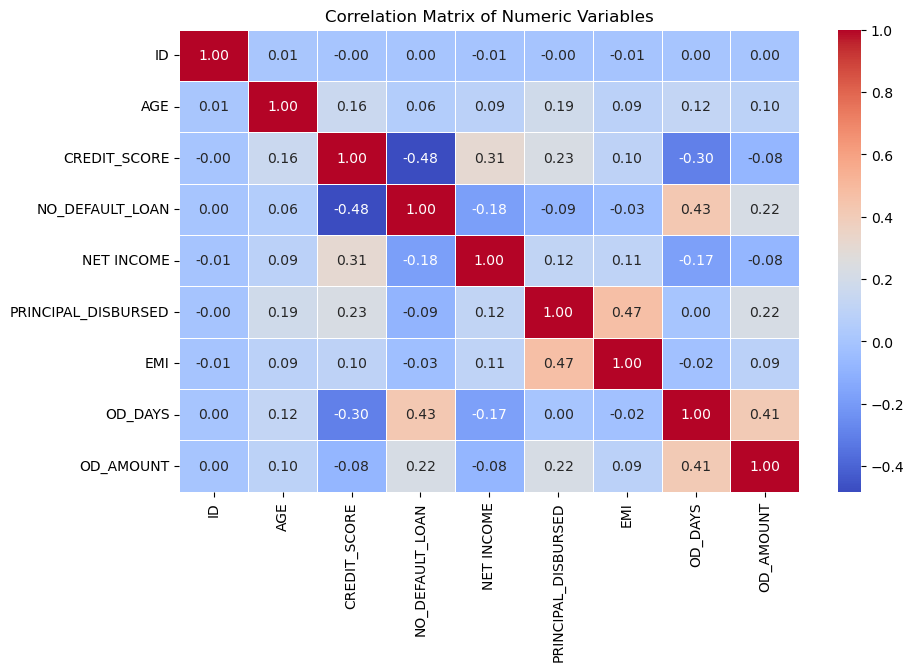

In [161]:
# Compute correlation matrix
numeric_df = df_cleaned.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))  # Adjust size
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Title
plt.title("Correlation Matrix of Numeric Variables")
plt.show()